In [24]:
from mortgage import Loan
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
loan = Loan(principal=1100000, interest=0.065, term=25)
loan.summarize

Original Balance:         $  1,100,000
Interest Rate:                   0.065 %
APY:                              6.70 %
APR:                              6.50 %
Term:                               25 years
Monthly Payment:          $    7427.28

Total principal payments: $1,100,000.00
Total interest payments:  $1,128,183.63
Total payments:           $2,228,183.63
Interest to principal:           102.6 %
Years to pay:                     25.0


In [26]:
class MyLoan:

    @staticmethod
    def recurring_payment(P, r, n):
        return P * (r * (1 + r)**n) / ((1 + r)**n - 1)

    def __init__(self, P, R, N, k = 12):
        self.P = P
        self.R = R
        self.N = N
        self.k = k

        self.r = R / k
        self.n = N * k
        self.p = self.recurring_payment(self.P, self.r, self.n)
        self.m = self.p * k / 12
    
    def print(self):
        print('--- Configuration ---')
        print('Principal P:', self.P)
        print('Interest R:', self.R * 100, '% pa')
        print('Term length N:', self.N, 'yrs')
        print('Payments per year k:', self.k)
        print('')
        print('--- Analysis ---')
        print('Payment per month m:', f'{self.m:.2f}')
        print('Total amount to be paid:', f'{(self.n * self.p):.2f}')
        print('Total interest to be paid: ', f'{(self.n * self.p - self.P):.2f}', f'({((self.n * self.p - self.P) / (self.n * self.p) * 100):.2f}', '%)')
        print('')

    def simulate(self):
        print('--- Simulation ---')
        results = []
        remaining = self.P
        num = 0
        while remaining > 0:
            num += 1
            months = num * 12 / self.k
            years = num / self.k
            total_paid = self.p
            interest_paid = remaining * self.r
            principal_paid = total_paid - interest_paid
            remaining -= principal_paid
            results.append((num, months, years, total_paid, interest_paid, principal_paid, remaining))
        print('')
        return pd.DataFrame(results, columns=['num', 'months', 'years', 'total', 'interest', 'principal', 'remaining'])

In [27]:
myLoan = MyLoan(P=1100000, R=0.065, N=25, k=12)
myLoan.print()


--- Configuration ---
Principal P: 1100000
Interest R: 6.5 % pa
Term length N: 25 yrs
Payments per year k: 12

--- Analysis ---
Payment per month m: 7427.28
Total amount to be paid: 2228183.63
Total interest to be paid:  1128183.63 (50.63 %)



In [28]:
results = myLoan.simulate()
results

--- Simulation ---



TypeError: Index(...) must be called with a collection of some kind, 'num' was passed

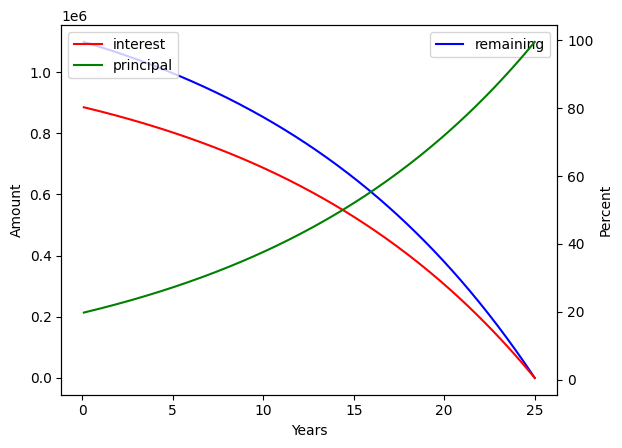

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(results['years'], results['remaining'], 'b', label='remaining')
ax1.set_xlabel('Years')
ax1.set_ylabel('Amount')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(results['years'], 100 * results['interest'] / results['total'], 'r', label='interest')
ax2.plot(results['years'], 100 * results['principal'] / results['total'], 'g', label='principal')
ax2.set_ylabel('Percent')
ax2.legend()
plt.show()